In [53]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import imageio
import pandas as pd 



In [55]:
im = imageio.imread(".\\imagenes_ML\\s3\\3.pgm")
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [56]:
print ('Max original ' , end= ' ')
print(np.amax(im))
print ('Min original ' , end= ' ')
print(np.amin(im))

Max original  204
Min original  10


In [57]:
im_original = im

im = im / 255

In [58]:
print ('Max original ' , end= ' ')
print(np.amax(im))
print ('Min original ' , end= ' ')
print(np.amin(im))

Max original  0.8
Min original  0.0392156862745098


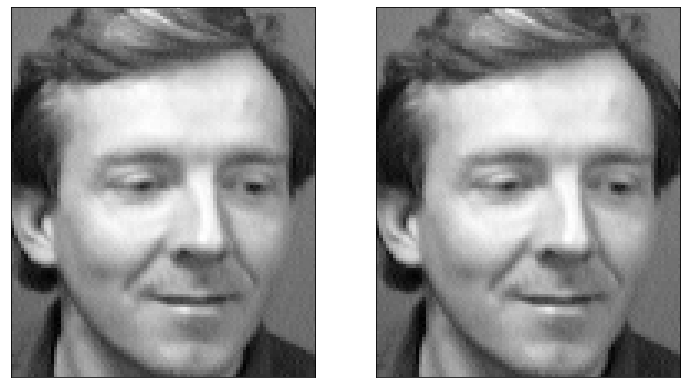

In [63]:
fig , ax = plt.subplots(1, 2, figsize=(12,12),
            subplot_kw={'xticks':[] , 'yticks':[] })

ax[0].imshow(im_original, cmap = 'gray')  
ax[1].imshow(im, cmap = 'gray')  

In [60]:
from glob import iglob


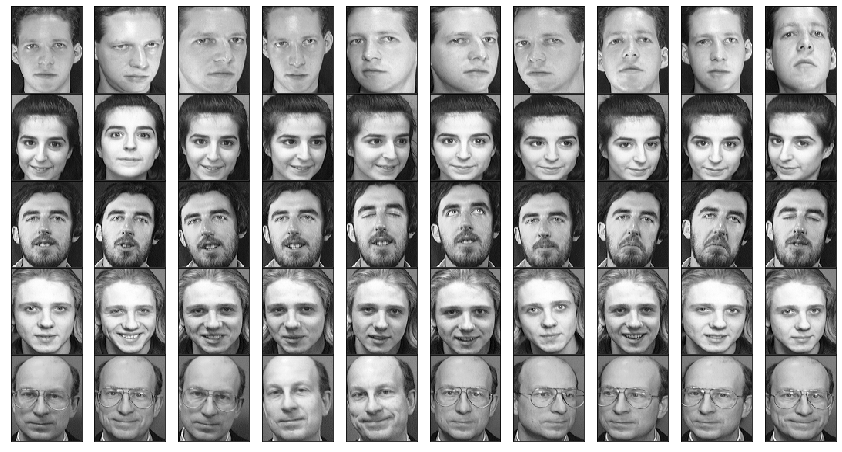

In [67]:
caras = pd.DataFrame([])

for path in iglob('.\\imagenes_ML\\*\\*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)


fig , axes = plt.subplots(5, 10, figsize=(15,8),
            subplot_kw={'xticks' : [] , 'yticks' : [] },
            gridspec_kw=dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = 'gray')

In [69]:
from sklearn.decomposition import PCA

In [91]:
#Aca vario el n_components de acuerdo al porcentaje de componentes que quiero recuperar (de 0 a 1 )
caras_PCA = PCA(n_components=0.7)

caras_PCA.fit(caras)

PCA(copy=True, iterated_power='auto', n_components=0.7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

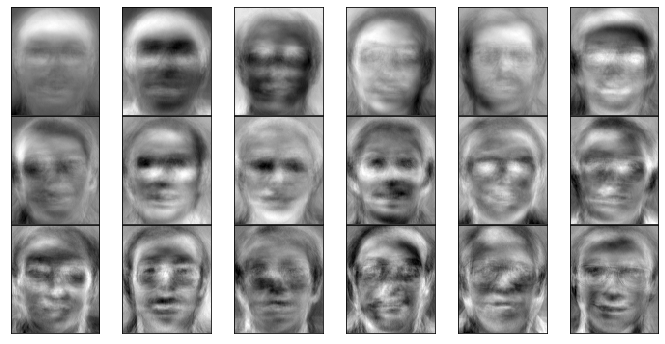

In [92]:
filas = 3
columnas = caras_PCA.n_components_ // filas 

fig , axes = plt.subplots(filas, columnas, figsize=(12,6),
            subplot_kw={'xticks' : [] , 'yticks' : [] },
            gridspec_kw=dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_PCA.components_[i].reshape(112,92), cmap = 'gray')

In [93]:
print(caras_PCA.n_components_)

20


In [94]:
componentes = caras_PCA.transform(caras)
proyeccion = caras_PCA.inverse_transform(componentes)

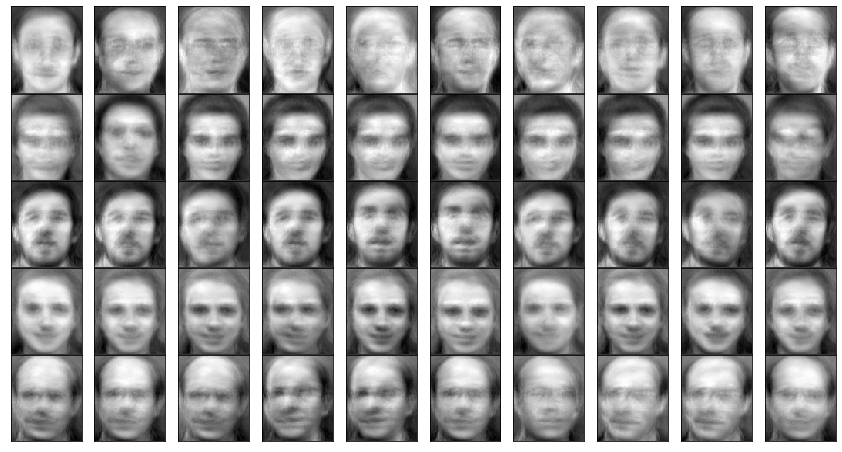

In [95]:
fig , axes = plt.subplots(5, 10, figsize=(15,8),
            subplot_kw={'xticks' : [] , 'yticks' : [] },
            gridspec_kw=dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = 'gray')